In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("california_housing_test.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


pandas.qcut
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

pandas.cut
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [4]:
pd.qcut(data['population'], q=4).value_counts()

(4.999, 780.0]        752
(1742.75, 11935.0]    750
(1155.0, 1742.75]     749
(780.0, 1155.0]       749
Name: population, dtype: int64

In [5]:
data['population']

0       1537.0
1        809.0
2       1484.0
3         49.0
4        850.0
         ...  
2995    1258.0
2996    3496.0
2997     693.0
2998      46.0
2999     753.0
Name: population, Length: 3000, dtype: float64

<AxesSubplot:>

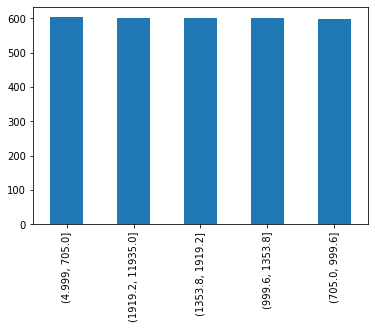

In [6]:
pd.qcut(data['population'], q=5).value_counts().plot(kind='bar')

In [7]:
label = ['sedikit',
         'banyak',
         'agak banyak',
         'biasa',
         'tidak sedikit']

label_populasi = pd.qcut(data['population'],
                        q = [0, 0.2, 0.4, 0.6, 0.8, 1],
                        labels = label)

label_populasi

0               biasa
1              banyak
2               biasa
3             sedikit
4              banyak
            ...      
2995      agak banyak
2996    tidak sedikit
2997          sedikit
2998          sedikit
2999           banyak
Name: population, Length: 3000, dtype: category
Categories (5, object): [sedikit < banyak < agak banyak < biasa < tidak sedikit]

<AxesSubplot:>

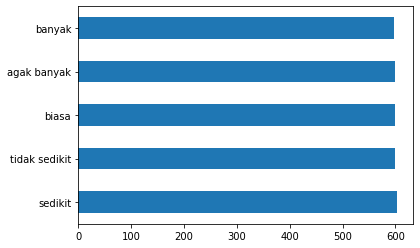

In [8]:
label_populasi.value_counts().plot(kind='barh')

In [9]:
data_umur_rumah = pd.cut(data['housing_median_age'], bins=5).value_counts()
data_umur_rumah

(31.6, 41.8]     817
(21.4, 31.6]     702
(11.2, 21.4]     699
(41.8, 52.0]     527
(0.949, 11.2]    255
Name: housing_median_age, dtype: int64

<AxesSubplot:>

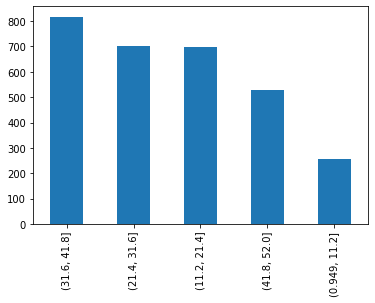

In [10]:
data_umur_rumah.plot(kind='bar')

In [11]:
label = ["lumayan tua",
        "biasa",
        "agak modern",
        "tua",
        "modern"]

label_umur_rumah = pd.cut(data['housing_median_age'],
                         bins = 5,
                         labels = label)

label_umur_rumah

0       agak modern
1            modern
2       agak modern
3       agak modern
4             biasa
           ...     
2995    agak modern
2996    agak modern
2997    lumayan tua
2998            tua
2999         modern
Name: housing_median_age, Length: 3000, dtype: category
Categories (5, object): [lumayan tua < biasa < agak modern < tua < modern]